# **WATER QUALITY** **ANALYSIS**





# In this part we will begin building your project by loading

In [3]:

import pandas as pd
file_path = "/content/water_potability.csv"
data = pd.read_csv(file_path)


In [4]:
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [6]:
selected_columns = data[['ph','Hardness','Solids','Chloramines']]
print(selected_columns)

            ph    Hardness        Solids  Chloramines
0          NaN  204.890455  20791.318981     7.300212
1     3.716080  129.422921  18630.057858     6.635246
2     8.099124  224.236259  19909.541732     9.275884
3     8.316766  214.373394  22018.417441     8.059332
4     9.092223  181.101509  17978.986339     6.546600
...        ...         ...           ...          ...
3271  4.668102  193.681735  47580.991603     7.166639
3272  7.808856  193.553212  17329.802160     8.061362
3273  9.419510  175.762646  33155.578218     7.350233
3274  5.126763  230.603758  11983.869376     6.303357
3275  7.874671  195.102299  17404.177061     7.509306

[3276 rows x 4 columns]


# In this part we begin with the preprocessing od datasae

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv('/content/water_potability.csv')

In [9]:
data['ph'].fillna(data['ph'].mean(), inplace=True)

In [10]:
label_encoder = LabelEncoder()
data['Hardness'] = label_encoder.fit_transform(data['Hardness'])

In [11]:
X = data.drop('Potability', axis=1)
y = data['Potability']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# In this part we beigns with the exploratory data analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('/content/water_potability.csv')


In [18]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [5]:
print(data.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


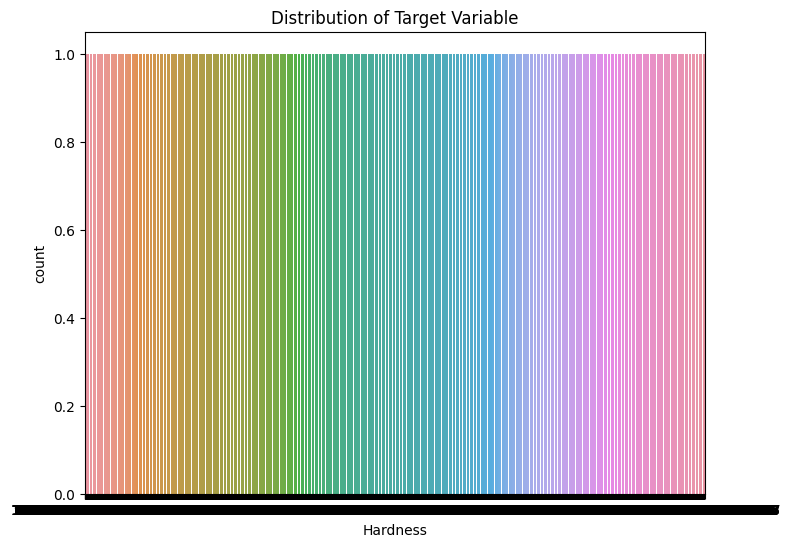

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hardness', data=data)
plt.title('Distribution of Target Variable')
plt.show()

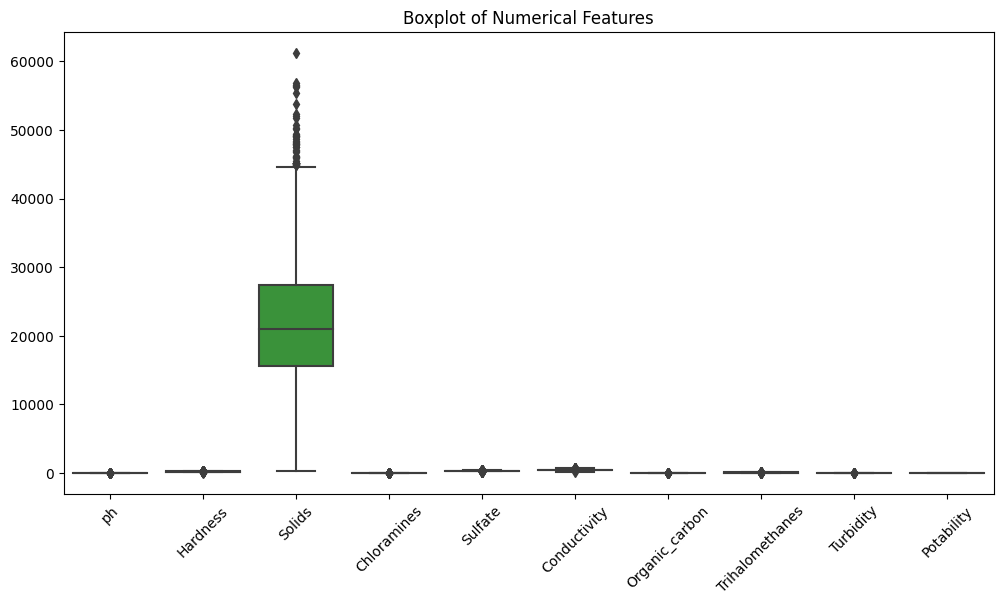

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


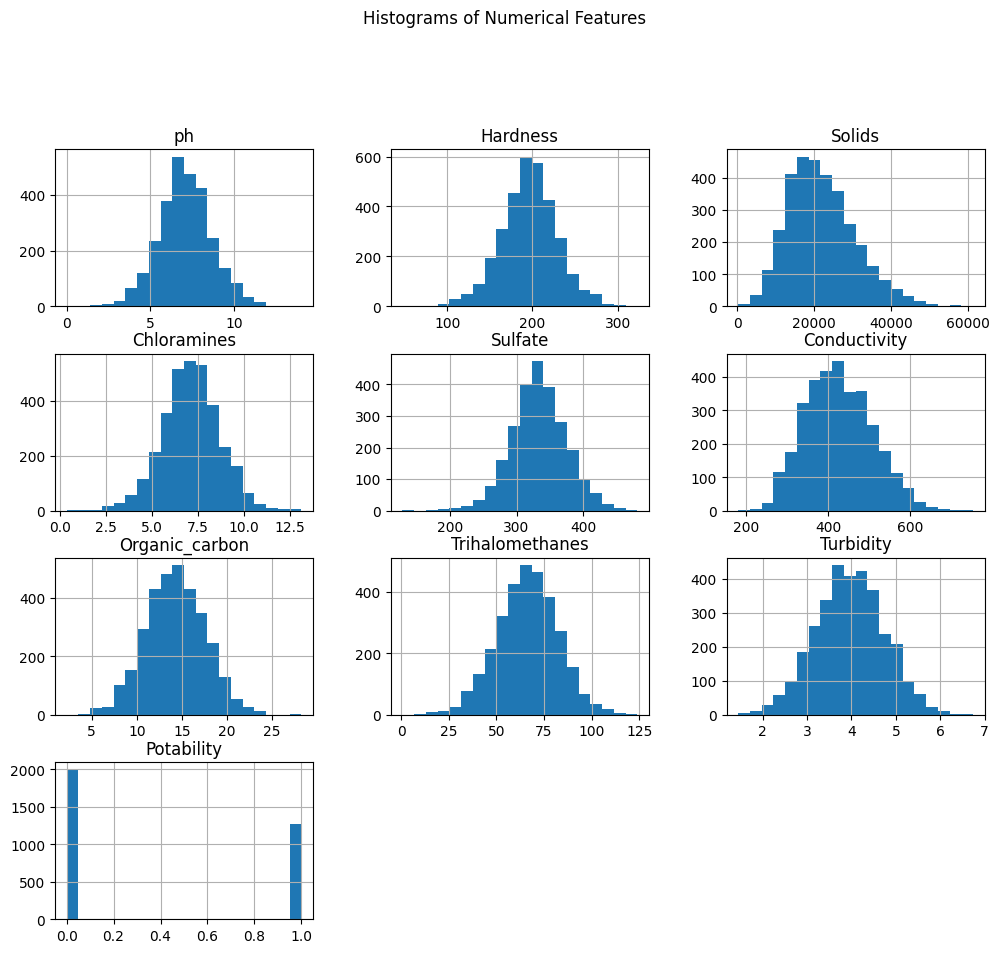

In [21]:
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

In [ ]:
data.fillna(data.mean(), inplace=True)

In [25]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [26]:
numeric_columns = ['Organic_carbon','Trihalomethanes','Turbidity']

In [29]:
for column in numeric_columns:
    data = handle_outliers_iqr(data, column)


# Visualize Parameter Distributions

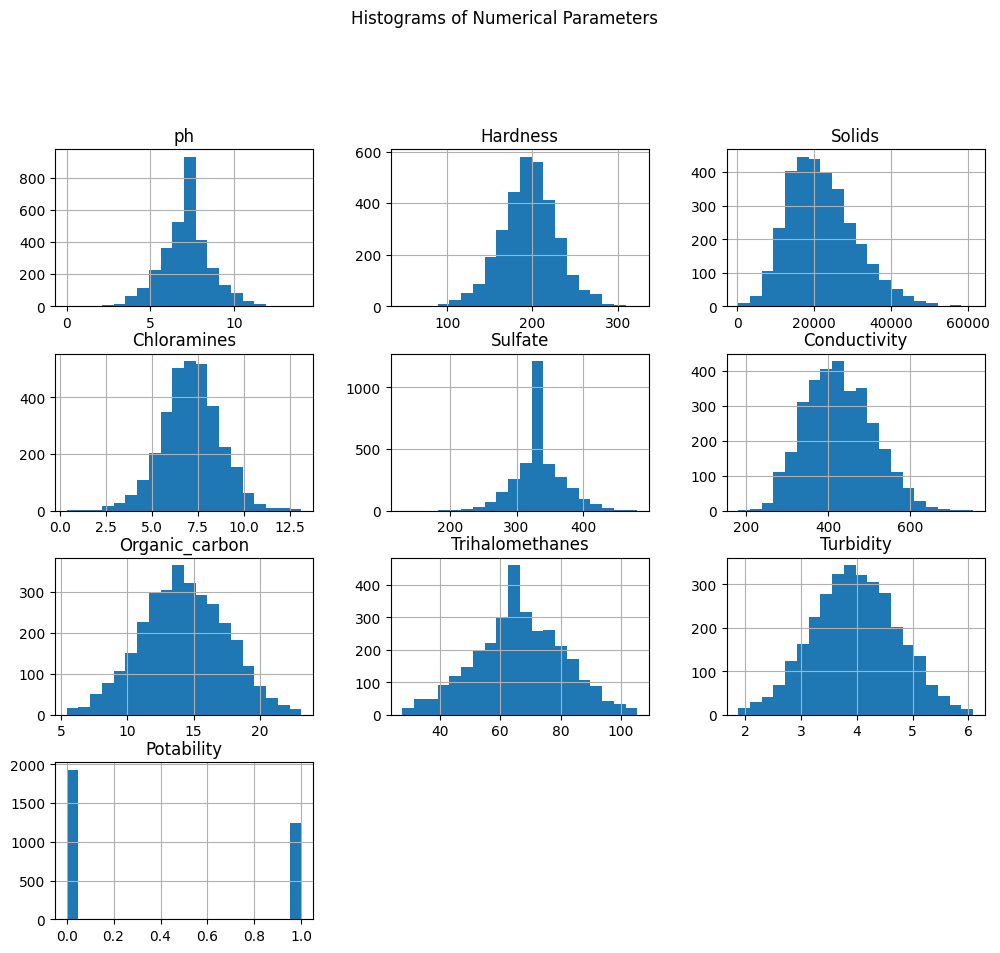

In [30]:
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Parameters", y=1.02)
plt.show()

# Visualize Correlations

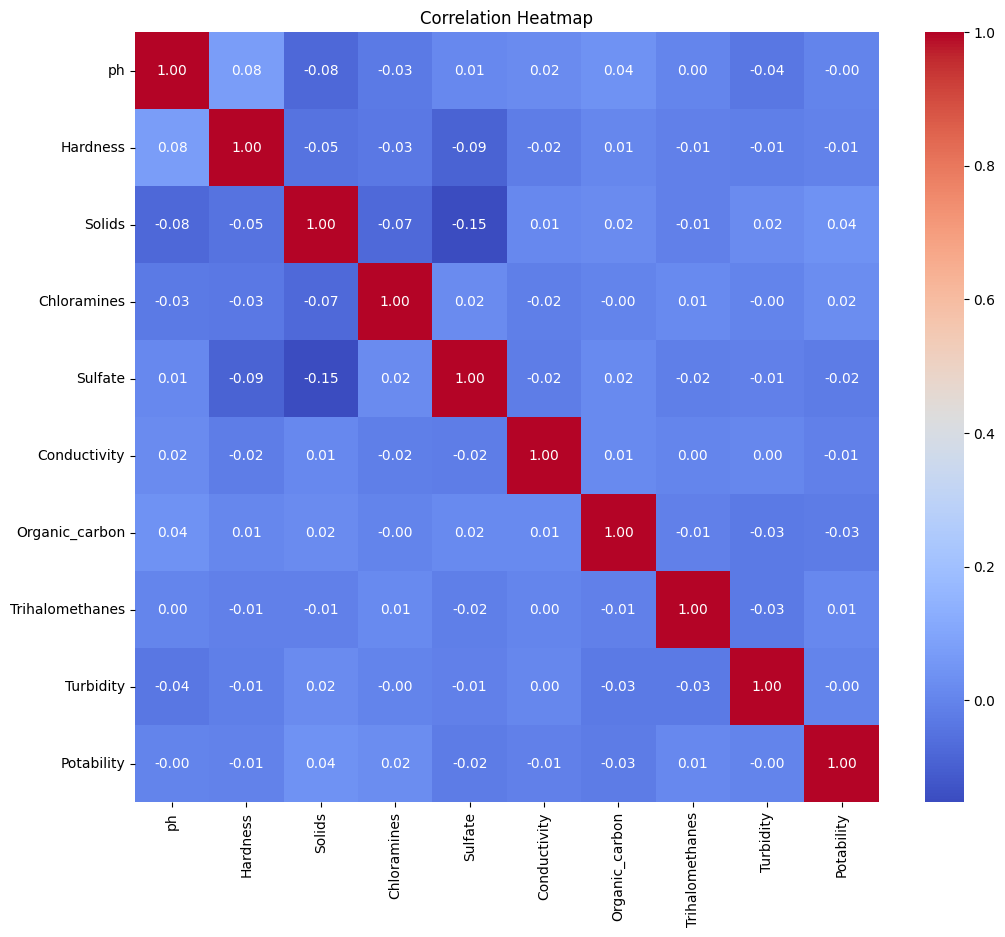

In [31]:
correlation_matrix = data.corr()
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Identify Potential Deviations from Standards

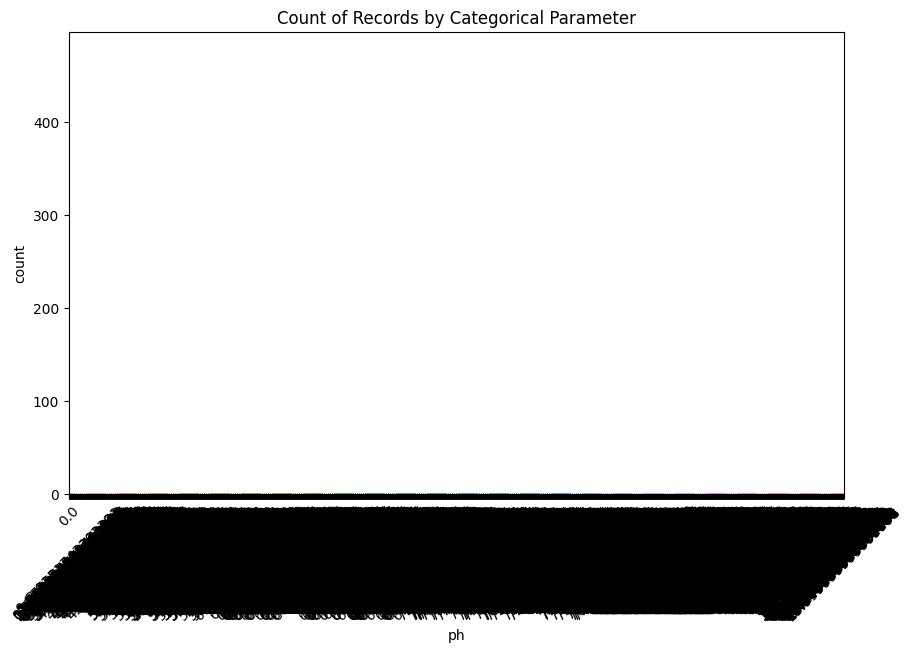

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ph', data=data)
plt.title('Count of Records by Categorical Parameter')
plt.xticks(rotation=45)
plt.show()